## Polinomios de Taylor

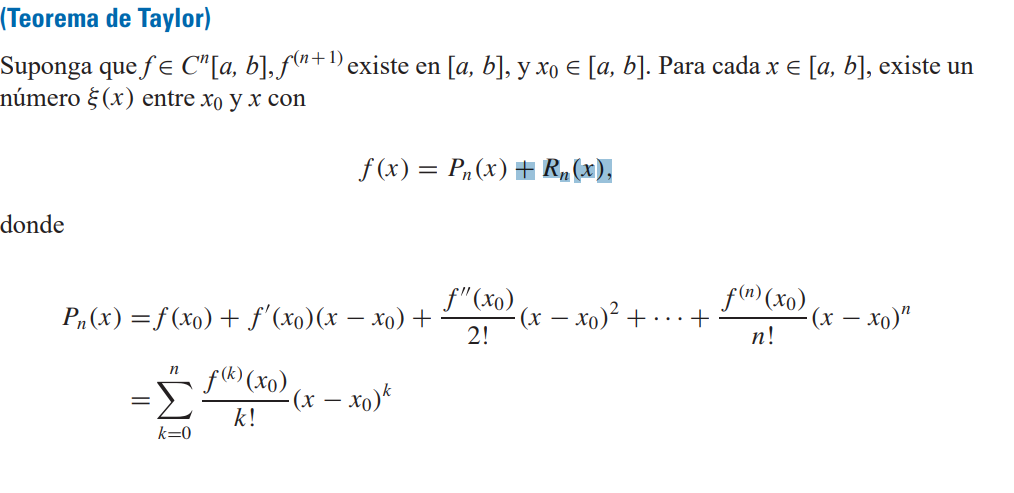

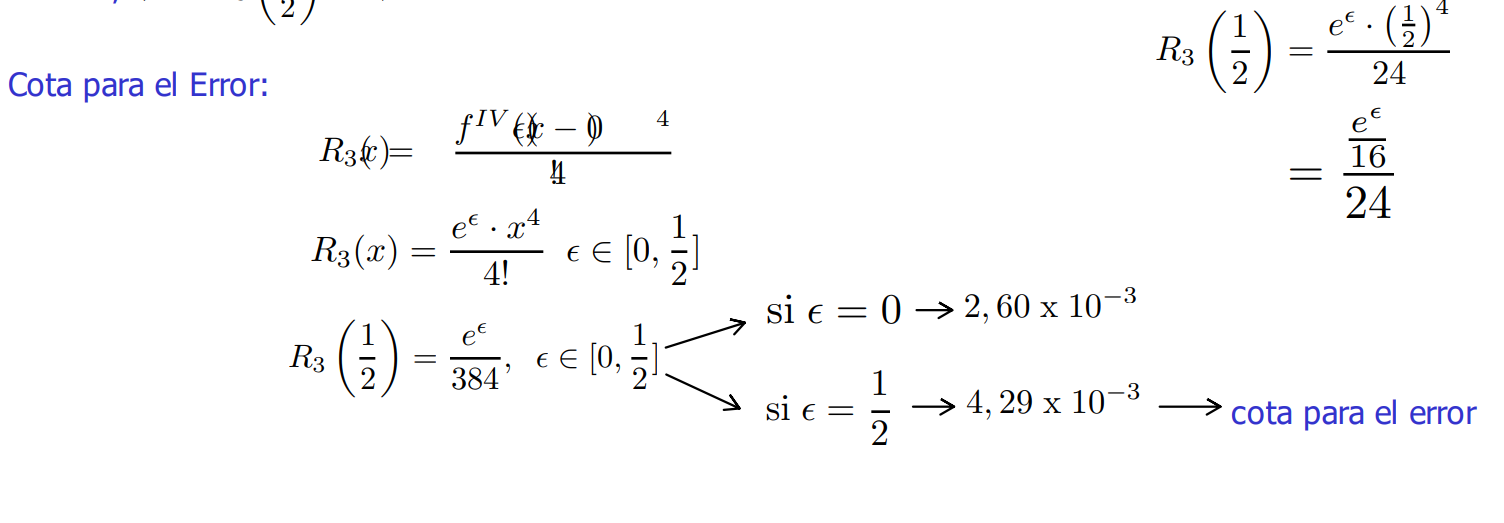

## Polinomios de Lagrange 

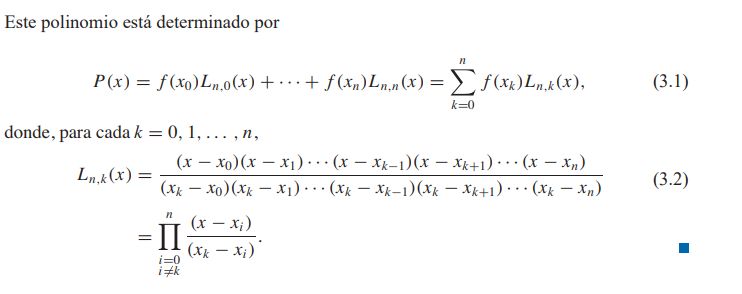


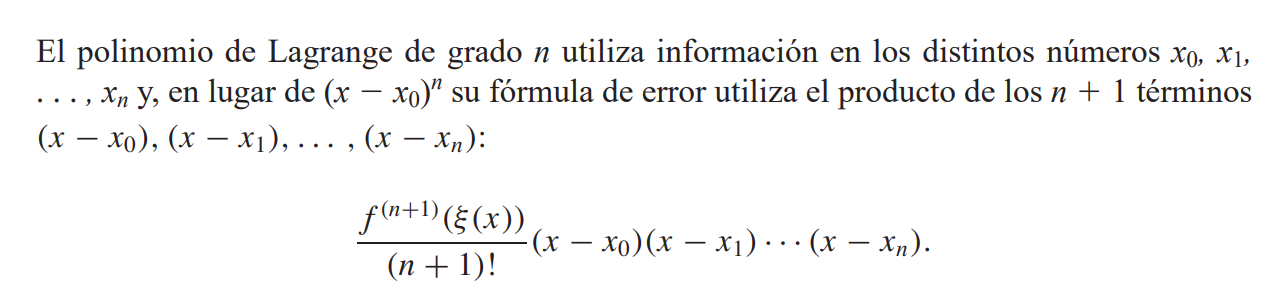

## Método de Neville


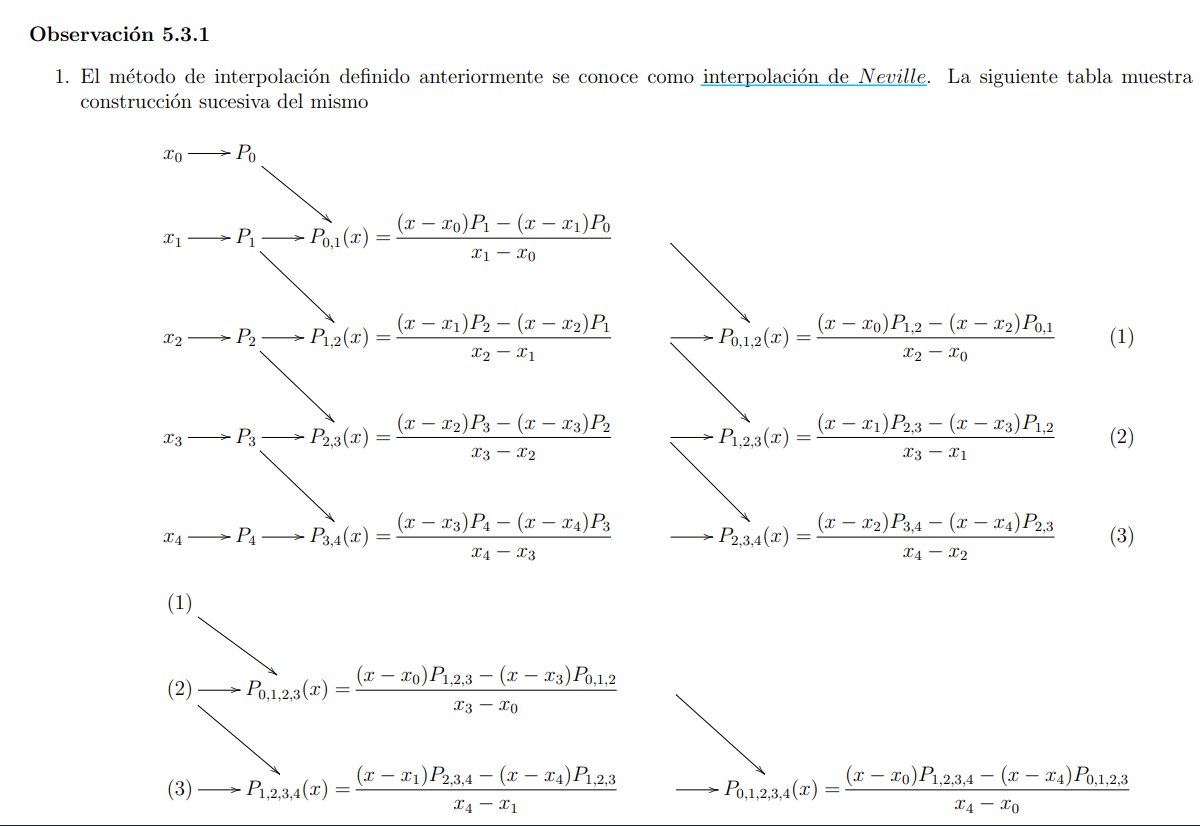

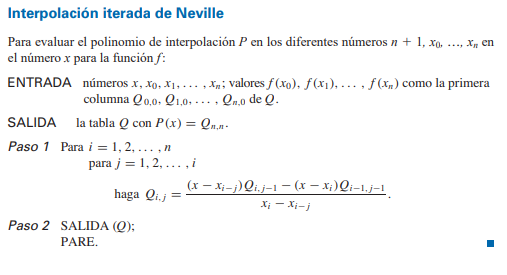

In [6]:
import numpy as np
from prettytable import PrettyTable
def fun_x(x_n):
    list_fx = []
    for x in x_n:
        list_fx.append(3**x)
    return list_fx
def fill_firts_time_matrix(x_n):
    result_matrix = np.zeros((len(x_n), len(x_n)))
    for i in range(len(x_n)):
        result_matrix[i][0] = x_n[i]
    return result_matrix
def fill_pretty_table(matrix_result,x_n):
    table = PrettyTable()
    table.add_column('',x_n)
    for i in range(len(matrix_result)):
        table.add_column('',matrix_result[:,i])
    return table
                         
def neville(x_n,x):
    # si no dan las funcion pero dan la lista de las y, remplazar fun_x(x_n) por esa lista en el la linea de abajo
    result_matrix = fill_firts_time_matrix(fun_x(x_n))
    # result_matrix = fill_firts_time_matrix(ylist) 
    #Ejm: fill_firts_time_matrix([0.7651977,0.6200860,0.4554022,0.2818186,0.1103623]
    i = 1
    while i < len(x_n):
        j = 1
        while j <= i:
            Q_i_j = ((x-x_n[i-j])*result_matrix[i][j-1] - (x-x_n[i])*result_matrix[i-1][j-1])/(x_n[i] - x_n[i-j])
            
            formula_numerador = '('+ str(x) + '-' + str(x_n[i-j])+')' + '*' + str(result_matrix[i][j-1]) + '-' +'('+str(x)+'-'+str(x_n[i])+')' + '*' + str(result_matrix[i-1][j-1]) 
            
            formula_denominador = str(x_n[i]) + '-' + str(x_n[i-j])
            print(i,j)
            print(formula_numerador+'\n'+'_____________________________________________'+'\n'+formula_denominador)
            print('='+str(Q_i_j))
            print('----------------------------------------')
            result_matrix[i][j] = Q_i_j
            j = j+1
        i = i+1
    return fill_pretty_table(result_matrix,x_n)

In [7]:
neville_method = neville([-2,-1,0,2,1],1/2)

1 1
(0.5--2)*0.3333333333333333-(0.5--1)*0.1111111111111111
_____________________________________________
-1--2
=0.6666666666666666
----------------------------------------
2 1
(0.5--1)*1.0-(0.5-0)*0.3333333333333333
_____________________________________________
0--1
=1.3333333333333333
----------------------------------------
2 2
(0.5--2)*1.3333333333333333-(0.5-0)*0.6666666666666666
_____________________________________________
0--2
=1.4999999999999998
----------------------------------------
3 1
(0.5-0)*9.0-(0.5-2)*1.0
_____________________________________________
2-0
=3.0
----------------------------------------
3 2
(0.5--1)*3.0-(0.5-2)*1.3333333333333333
_____________________________________________
2--1
=2.1666666666666665
----------------------------------------
3 3
(0.5--2)*2.1666666666666665-(0.5-2)*1.4999999999999998
_____________________________________________
2--2
=1.9166666666666665
----------------------------------------
4 1
(0.5-2)*3.0-(0.5-1)*9.0
_____________________

In [8]:
print(neville_method.get_string())

+----+--------------------+--------------------+--------------------+--------------------+-------------------+
|    |                    |                    |                    |                    |                   |
+----+--------------------+--------------------+--------------------+--------------------+-------------------+
| -2 | 0.1111111111111111 |        0.0         |        0.0         |        0.0         |        0.0        |
| -1 | 0.3333333333333333 | 0.6666666666666666 |        0.0         |        0.0         |        0.0        |
| 0  |        1.0         | 1.3333333333333333 | 1.4999999999999998 |        0.0         |        0.0        |
| 2  |        9.0         |        3.0         | 2.1666666666666665 | 1.9166666666666665 |        0.0        |
| 1  |        3.0         |        -0.0        |        1.5         | 1.6666666666666665 | 1.708333333333333 |
+----+--------------------+--------------------+--------------------+--------------------+-------------------+


##  Diferencias Divididas de Newton

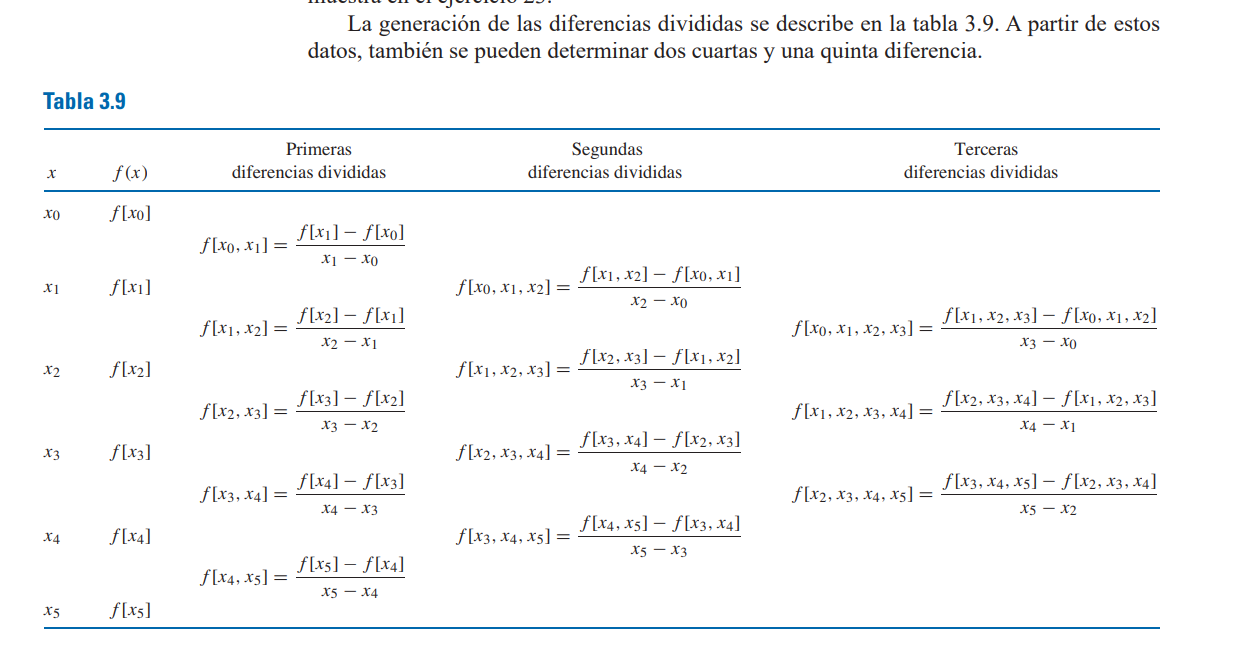

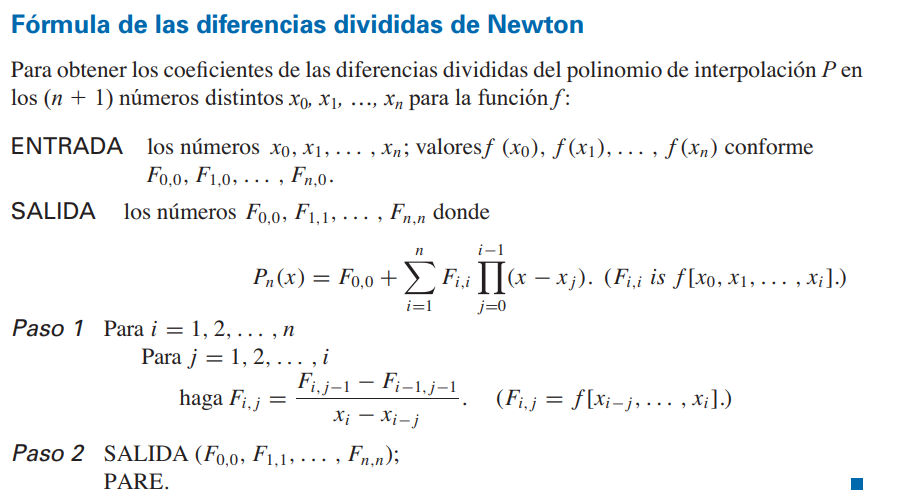

In [1]:
import numpy as np
from prettytable import PrettyTable
def funx(x_n):
    list_fx = []
    for x in x_n:
        list_fx.append(3**x)
    return list_fx
def fill_firts_time_matrix_newton(x_n):
    result_matrix = np.zeros((len(x_n), len(x_n)))
    for i in range(len(x_n)):
        result_matrix[i][0] = x_n[i]
    return result_matrix
def fill_pretty_table2(matrix_result,x_n):
    table = PrettyTable()
    table.add_column('',x_n)
    for i in range(len(matrix_result)):
        table.add_column('',matrix_result[:,i])
    return table

def diferencias_newton(x_n,fx_n):
    result_matrix = fill_firts_time_matrix_newton(fx_n)
    i = 1
    while i < len(x_n):
        j = 1
        while j <= i:
            F_i_j = (result_matrix[i][j-1] - result_matrix[i-1][j-1])/(x_n[i] - x_n[i-j])
            result_matrix[i][j] = F_i_j
            j = j+1
        i = i+1
    return fill_pretty_table2(result_matrix,x_n)

In [2]:
newton = diferencias_newton([1.0,2.0,3.0,4.0,5.0,6.0],[14.5,19.5,30.5,53.5,94.5,159.5])
print(newton.get_string())

+-----+-------+------+------+-----+-----+-----+
|     |       |      |      |     |     |     |
+-----+-------+------+------+-----+-----+-----+
| 1.0 |  14.5 | 0.0  | 0.0  | 0.0 | 0.0 | 0.0 |
| 2.0 |  19.5 | 5.0  | 0.0  | 0.0 | 0.0 | 0.0 |
| 3.0 |  30.5 | 11.0 | 3.0  | 0.0 | 0.0 | 0.0 |
| 4.0 |  53.5 | 23.0 | 6.0  | 1.0 | 0.0 | 0.0 |
| 5.0 |  94.5 | 41.0 | 9.0  | 1.0 | 0.0 | 0.0 |
| 6.0 | 159.5 | 65.0 | 12.0 | 1.0 | 0.0 | 0.0 |
+-----+-------+------+------+-----+-----+-----+


## Trazador Cubico Natural o Spline cúbico natural

In [68]:
import numpy as np
def trazador_cubico_natural(x_n,a_n):
    alpha = []
    n = len(x_n)-1
    h = []
    l_n = []
    u_n = []
    z_n = []
    c_n = [None]*len(x_n)
    b_n = [None]*len(x_n)
    d_n = [None]*len(x_n)
    
    i = 0
    while i <= n-1:
        h.append(x_n[i+1] - x_n[i])
        i = i+1
    i = 1
    while i <= n-1:
        aux = (3/h[i]) * (a_n[i+1] - a_n[i]) - (3/h[i-1]) * (a_n[i] - a_n[i-1])
        alpha.append(aux)
        i = i+1
    print(alpha) 
    l_n.append(1)
    u_n.append(0)
    z_n.append(0)
    
    i = 1
    while i <= n-1:
        print(i,len(h))
        print(h)
        print(n)
        l_n.append(2*(x_n[i+1] - x_n[i-1]) - h[i-1] * u_n[i-1])
        u_n.append(h[i]/l_n[i])
        z_n.append((alpha[i] - h[i-1] * z_n[i-1])/l_n[i])
        i = i+1
        
    l_n.append(1)
    z_n.append(0)
    c_n[n] = 0
    print(z_n)
    j = n
    while j >= n:
        print(j)
        c_n[j] = z_n[j] - u_n[j]*c_n[j+1]
        b_n[j] = ((a_n[j+1] - a_n[j])/h[j]) - h[j] * (c_n[j+1] + 2*c_n[j])/3
        d_n[j] = (c_n[j+1] - c_n[j])/(3*h[j])
        j = j-1
           
    print('aj: ', a_n)
    print('bj: ', b_n)
    print('cj: ', c_n)
    print('dj: ', d_n)

In [69]:
trazador_cubico_natural([0,1,2,3],[0,1/2,2,7/2])

[3.0, 0.0]
1 3
[1, 1, 1]
3
2 3
[1, 1, 1]
3


IndexError: list index out of range

In [23]:
2+ np.sin(2*np.sqrt(6))

NameError: name 'alpha' is not defined

In [70]:
k = [0]*3
k.append(1)
k.append(2)
k

[0, 0, 0, 1, 2]

In [72]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def traza3natural(xi,yi):
    n = len(xi)
    
    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)

# PROGRAMA -----------------------
# INGRESO , Datos de prueba
xi = np.array([0,1,2,3])
fi = np.array([0,1/2,2,7/2])
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

Polinomios por tramos: 
 x = [0,1]
0.266666666666667*x**3 + 0.233333333333333*x
 x = [1,2]
-0.333333333333333*x**3 + 1.8*x**2 - 1.56666666666667*x + 0.6
 x = [2,3]
0.0666666666666667*x**3 - 0.6*x**2 + 3.23333333333333*x - 2.6
